The goal of this notebook is to read each page of wikipedia from the csv file and clean it for nlp analysis

In [70]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download it one time
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
wiki_phys = pd.read_csv("../data/wiki_phys_scrape.csv")

In [46]:
wiki_phys.head()

,Name,Link,Subcategory
0,Wikipedia:FAQ/Categorization,https://en.wikipedia.org/wiki/Wikipedia:FAQ/Ca...,Concepts in physics
1,Category:Concepts in physics,https://en.wikipedia.org/w/index.php?title=Cat...,Concepts in physics
2,4D vector,https://en.wikipedia.org/wiki/4D_vector,Concepts in physics
3,Active and passive transformation,https://en.wikipedia.org/wiki/Active_and_passi...,Concepts in physics
4,Ansatz,https://en.wikipedia.org/wiki/Ansatz,Concepts in physics


In [49]:
wiki_phys['Link'][3]

'https://en.wikipedia.org/wiki/Active_and_passive_transformation'

In [85]:
def load_wiki_article(url):
    wiki_article = urlopen(url).read()
    # parse the file as html.
    wiki_article_parsed = soup(wiki_article,"html.parser")
    # get the text from different paragraph labels
    wiki_text_list =[paragraph.text for paragraph in wiki_article_parsed.findAll('p')] 
    # combine the list into one big text
    wiki_text = " ".join(wiki_text_list)
    
    return wiki_text

def clean_wiki(url):
    # the parse and load the article 
    wiki_article_text = load_wiki_article(url)
    # tokenize the word 
    tokens = word_tokenize(wiki_article_text)
    # remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    # convert to all lower case
    words = [word.lower() for word in words]
    
    # remove common stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # get rid of single words
    words = [word for word in words if len(word) >1]

    
    # lemmatizing the words
    # choose lemmatization over stemming since lemmatization gives more accurate word root though being slower.
    # since our data size is relatively small. For bigger data size, we can use the production-ready Spacy library.
    # I will use the default lemmatization algoirthm in nltk, which transform all words to nouns. 
    lemma = WordNetLemmatizer()
    words = [lemma.lemmatize(word) for word in words]
    
    cleaned_wiki_text = " ".join(words)
    
    return cleaned_wiki_text

In [91]:
all_cleaned_text = wiki_phys["Link"].map(clean_wiki)

In [93]:
all_cleaned_text.head()

0    help faq categorization faq frequently asked q...
1    category comprises topic fundamental descripti...
2    computer science vector vector data type us in...
3    physic engineering spatial transformation eucl...
4    physic mathematics ansatz german ˈʔanzats mean...
Name: Link, dtype: object

In [94]:
wiki_phys["Text"] = all_cleaned_text

In [95]:
wiki_phys.head()

,Name,Link,Subcategory,Text
0,Wikipedia:FAQ/Categorization,https://en.wikipedia.org/wiki/Wikipedia:FAQ/Ca...,Concepts in physics,help faq categorization faq frequently asked q...
1,Category:Concepts in physics,https://en.wikipedia.org/w/index.php?title=Cat...,Concepts in physics,category comprises topic fundamental descripti...
2,4D vector,https://en.wikipedia.org/wiki/4D_vector,Concepts in physics,computer science vector vector data type us in...
3,Active and passive transformation,https://en.wikipedia.org/wiki/Active_and_passi...,Concepts in physics,physic engineering spatial transformation eucl...
4,Ansatz,https://en.wikipedia.org/wiki/Ansatz,Concepts in physics,physic mathematics ansatz german ˈʔanzats mean...


In [98]:
wiki_phys.to_csv("wiki_phys_cleaned.csv",index=False)

# add the length of the article 

In [101]:
def get_article_len(url):
    wiki_article_text = load_wiki_article(url)
    # tokenize by word
    tokens = word_tokenize(wiki_article_text)
    return len(tokens)

In [103]:
wiki_article_len = wiki_phys["Link"].map(get_article_len)

In [104]:
wiki_phys['Length'] = wiki_article_len

# add other articles titles that are referenced. 

In [105]:
def get_paragraph_reference(url):
    wiki_article = urlopen(url).read()
    # parse the file as html.
    wiki_article_parsed = soup(wiki_article,"html.parser")
    
    title_list = list()

    all_paragraphs = wiki_article_parsed.findAll('p')

    # only include titles for reference in the paragraphs. 
    for paragraph in all_paragraphs:
        a_list = paragraph.findAll("a")
        for each_a in a_list:
            try:
                title_list.append(each_a['title'])
            except:
                # just pass since some a does not have a title. 
                pass   
    
    return title_list

In [106]:
wiki_article_referenced = wiki_phys["Link"].map(get_paragraph_reference)

In [107]:
wiki_phys['Reference'] =  wiki_article_referenced

In [109]:
wiki_phys.head(20)

,Name,Link,Subcategory,Text,Length,Reference
0,Wikipedia:FAQ/Categorization,https://en.wikipedia.org/wiki/Wikipedia:FAQ/Ca...,Concepts in physics,help faq categorization faq frequently asked q...,3359,"[Help:Contents, Help:Contents, Wikipedia:FAQ/I..."
1,Category:Concepts in physics,https://en.wikipedia.org/w/index.php?title=Cat...,Concepts in physics,category comprises topic fundamental descripti...,94,"[Wave, Momentum, Wikipedia:FAQ/Categorization]"
2,4D vector,https://en.wikipedia.org/wiki/4D_vector,Concepts in physics,computer science vector vector data type us in...,441,"[Computer science, Vector (mathematics), Data ..."
3,Active and passive transformation,https://en.wikipedia.org/wiki/Active_and_passi...,Concepts in physics,physic engineering spatial transformation eucl...,1121,"[Physics, Engineering, Transformation (mathema..."
4,Ansatz,https://en.wikipedia.org/wiki/Ansatz,Concepts in physics,physic mathematics ansatz german ˈʔanzats mean...,276,"[Physics, Mathematics, Help:IPA/English, Help:..."
5,Araki–Sucher correction,https://en.wikipedia.org/wiki/Araki%E2%80%93Su...,Concepts in physics,atomic molecular optical physic correction cor...,160,"[Atomic, molecular, and optical physics, Energ..."
6,Arrow of time,https://en.wikipedia.org/wiki/Arrow_of_time,Concepts in physics,arrow time time arrow concept direction asymme...,2193,"[Time, Arthur Eddington, Physics, Atom, Molecu..."
7,Asymptotic safety in quantum gravity,https://en.wikipedia.org/wiki/Asymptotic_safet...,Concepts in physics,asymptotic safety sometimes also referred nonp...,5097,"[Quantum field theory, Gravitation, Renormaliz..."
8,Bell's theorem,https://en.wikipedia.org/wiki/Bell%27s_theorem,Concepts in physics,bell theorem theorem draw important distinctio...,6903,"[No-go theorem, Quantum mechanics, Classical m..."
9,Boltzmann's entropy formula,https://en.wikipedia.org/wiki/Boltzmann%27s_en...,Concepts in physics,statistical mechanic boltzmann equation probab...,1077,"[Statistical mechanics, Entropy, Microstate (s..."


In [110]:
wiki_phys.to_csv("wiki_phys_cleaned.csv",index=False)

In [111]:
wiki_phys.shape

(1570, 6)

Some visualization of the basic properties of the data

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,0,'Length of articles')

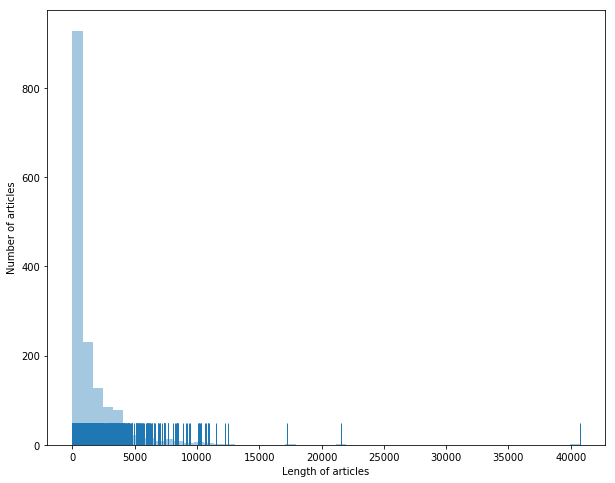

In [123]:
plt.figure(figsize= (10,8))
plt.ylabel("Number of articles")
sns.distplot(wiki_phys['Length'],kde=False, rug=True)
plt.xlabel("Length of articles")

High frequency words after cleaning

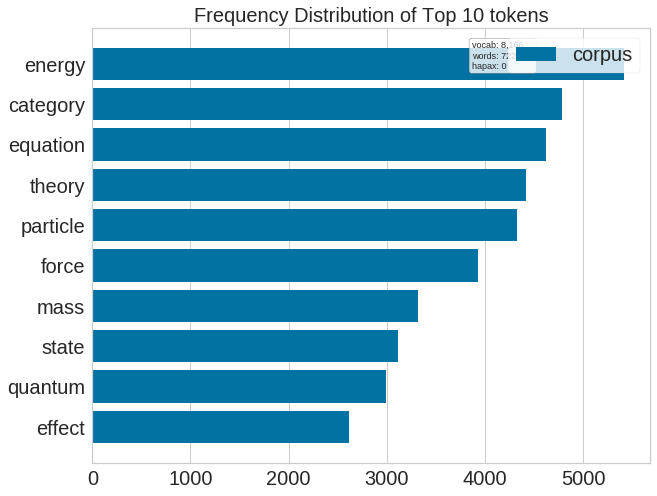

In [136]:
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer


# use the vectorizer from above
# count vectorizer 
vectorizer=CountVectorizer(min_df=5,max_df=0.4
                           ,stop_words='english',lowercase='True'
                          ,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
dtm_count=vectorizer.fit_transform(wiki_phys['Text'].values.astype('U'))

# get all the unique words
features=vectorizer.get_feature_names()


import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 42


import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.title("Top 10 frequent terms")

visualizer=FreqDistVisualizer(features=features,n=10)
visualizer.fit(dtm_count)
visualizer.poof()


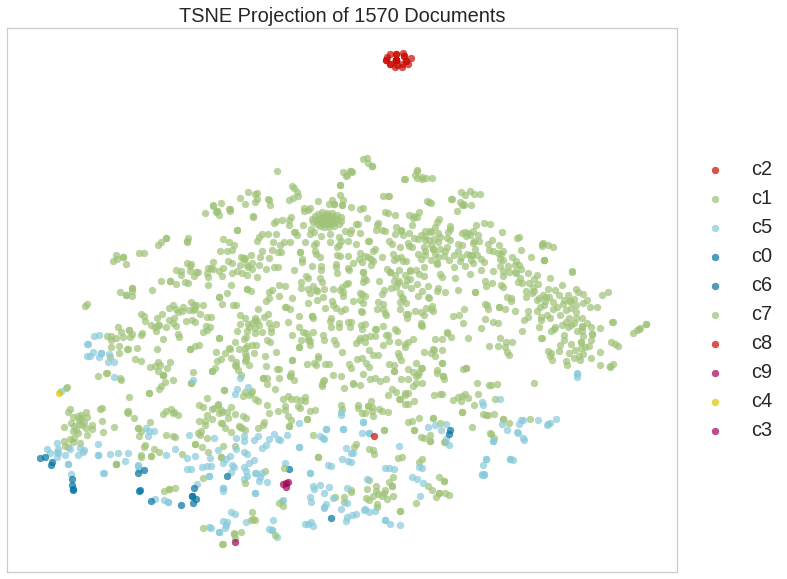

In [143]:
from yellowbrick.text import TSNEVisualizer
plt.figure(figsize=(15,10))
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=10).fit(dtm_count)
tsne2 = TSNEVisualizer(decompose='svd')
tsne2.fit(dtm_count, ["c{}".format(c) for c in clusters.labels_])
tsne2.poof()

Try using tfidf instead of countvectorizer

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(min_df=5,max_df=0.4
                           ,stop_words='english',lowercase='True'
                          ,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tfidf_count=tfidf_vectorizer.fit_transform(wiki_phys['Text'].values.astype('U'))

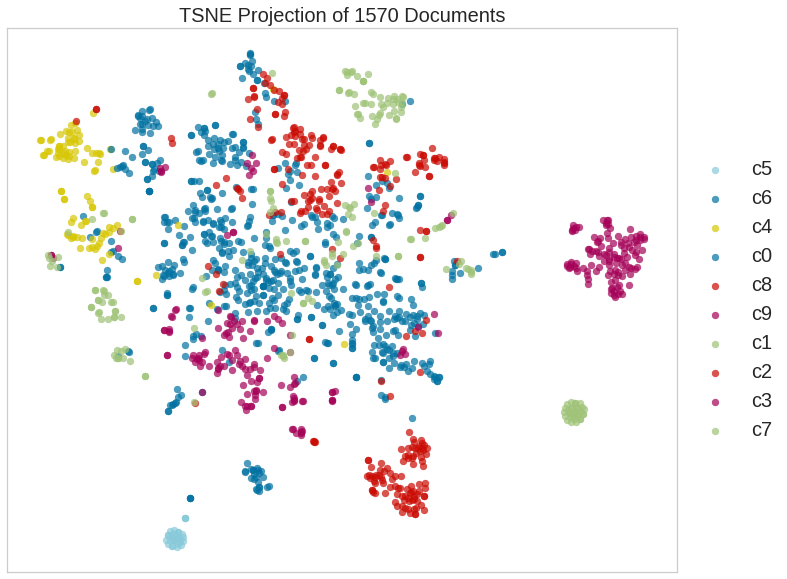

In [152]:
from yellowbrick.text import TSNEVisualizer
plt.figure(figsize=(15,10))
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=10).fit(tfidf_count)
tsne2 = TSNEVisualizer(decompose='svd')
tsne2.fit(tfidf_count, ["c{}".format(c) for c in clusters.labels_])
tsne2.poof()

The tsne plot with the true subcategory labels.

In [147]:
subcategory = wiki_phys['Subcategory'].values

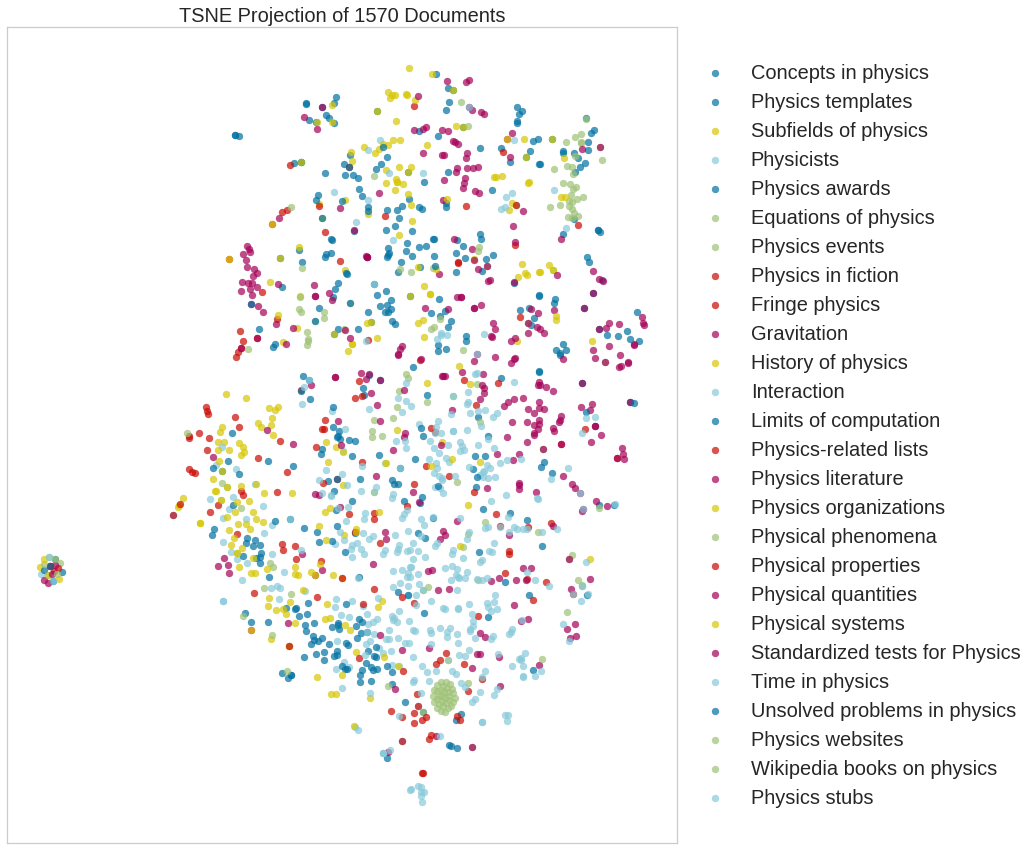

In [160]:
subcategory=list(subcategory)
plt.figure(figsize=(15,15))
tsne2 = TSNEVisualizer(decompose='svd')
tsne2.fit(dtm_count, subcategory)
plt.title("The TSNE projection from the Countvectorizer")
tsne2.poof()

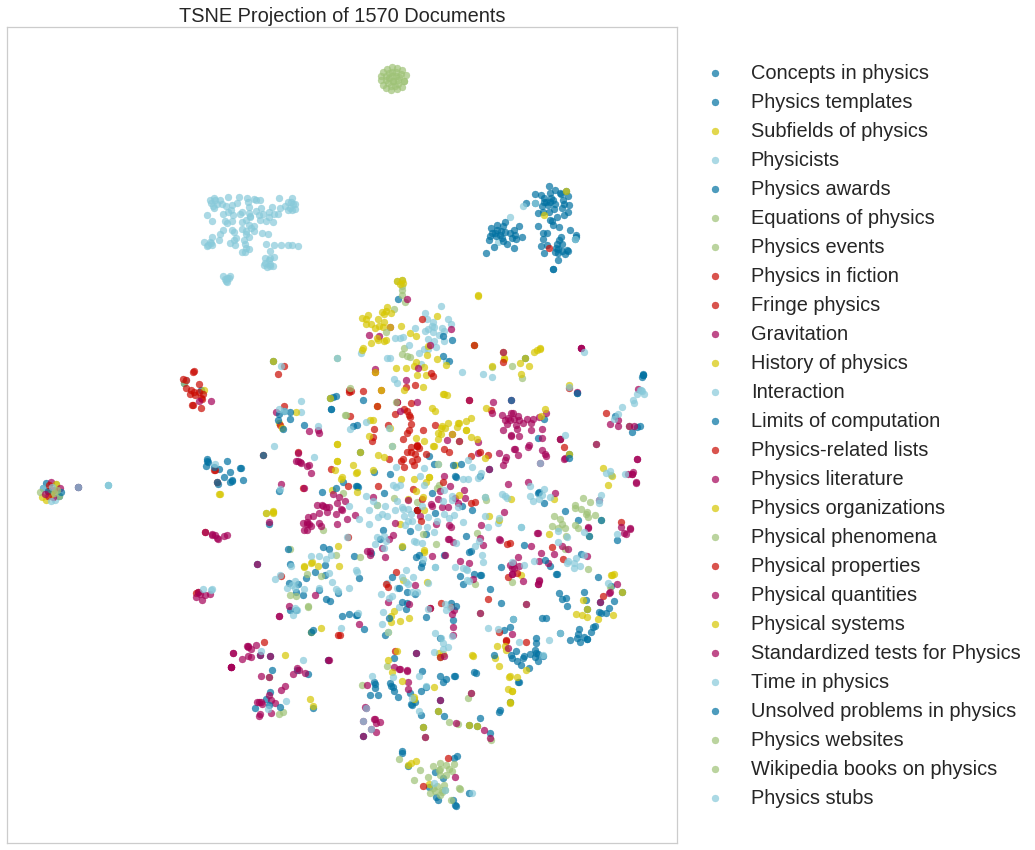

In [159]:
subcategory=list(subcategory)
plt.figure(figsize=(15,15))
tsne2 = TSNEVisualizer(decompose='svd')
tsne2.fit(tfidf_count, subcategory)
plt.title("The TSNE projection from the Tfidfvectorizer")
tsne2.poof()